In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<ipython-input-5-d1e95c195993>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breakfast_counts.index, y=breakfast_counts.values, palette='spring')


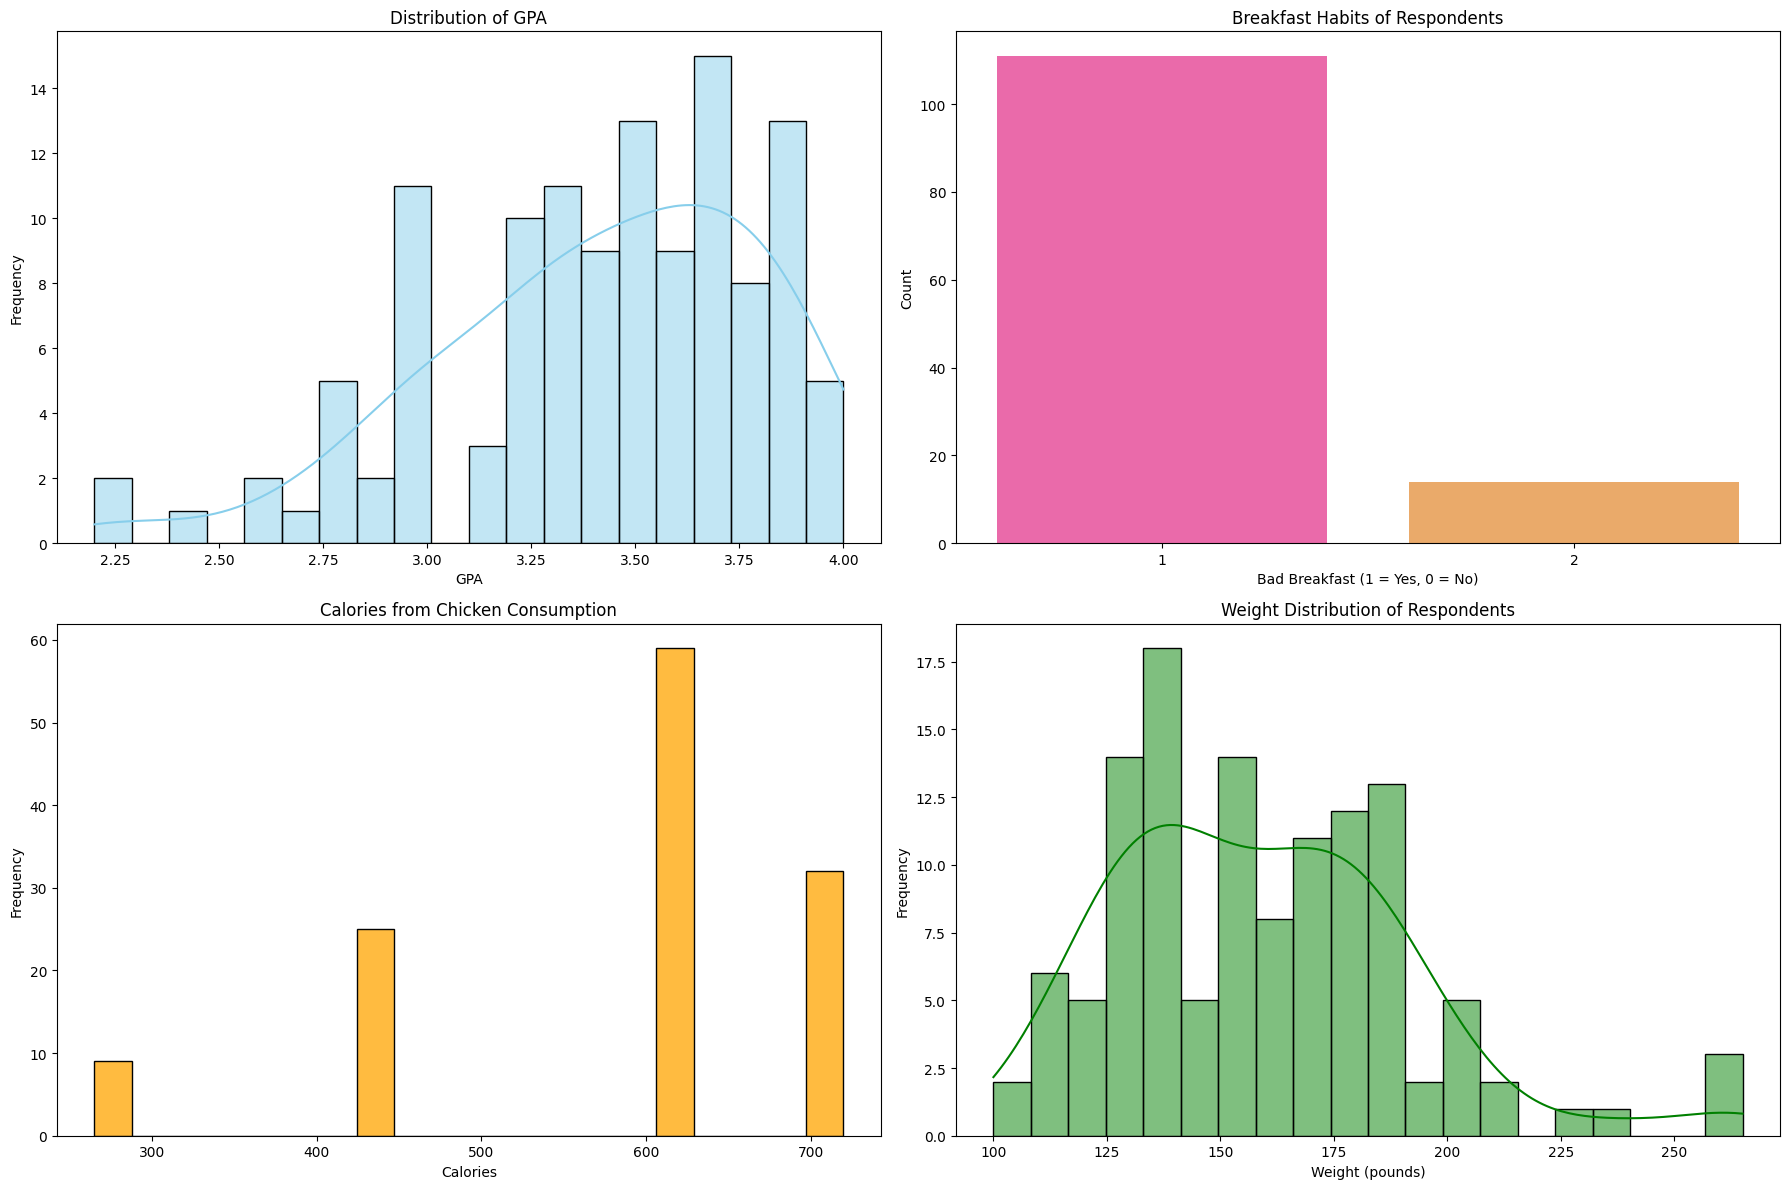

In [ ]:

# Load the dataset
data_path = '/content/food_coded.csv'
food_data = pd.read_csv(data_path)

# Data cleaning
food_data['GPA'] = pd.to_numeric(food_data['GPA'], errors='coerce')
food_data['weight'] = food_data['weight'].str.extract('(\d+)').astype(float)

# Visualizations
plt.figure(figsize=(18, 12))

# GPA Distribution
plt.subplot(2, 2, 1)
sns.histplot(food_data['GPA'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Breakfast Habits
plt.subplot(2, 2, 2)
breakfast_counts = food_data['breakfast'].value_counts().sort_index()
sns.barplot(x=breakfast_counts.index, y=breakfast_counts.values, palette='spring')
plt.title('Breakfast Habits of Respondents')
plt.xlabel('Bad Breakfast (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Calories from Chicken Consumption
plt.subplot(2, 2, 3)
sns.histplot(food_data['calories_chicken'].dropna(), bins=20, color='orange')
plt.title('Calories from Chicken Consumption')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Weight Distribution
plt.subplot(2, 2, 4)
sns.histplot(food_data['weight'].dropna(), kde=True, bins=20, color='green')
plt.title('Weight Distribution of Respondents')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-6-f6136f164496>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(feature_names), x=list(importances), orient='h', palette='mako')


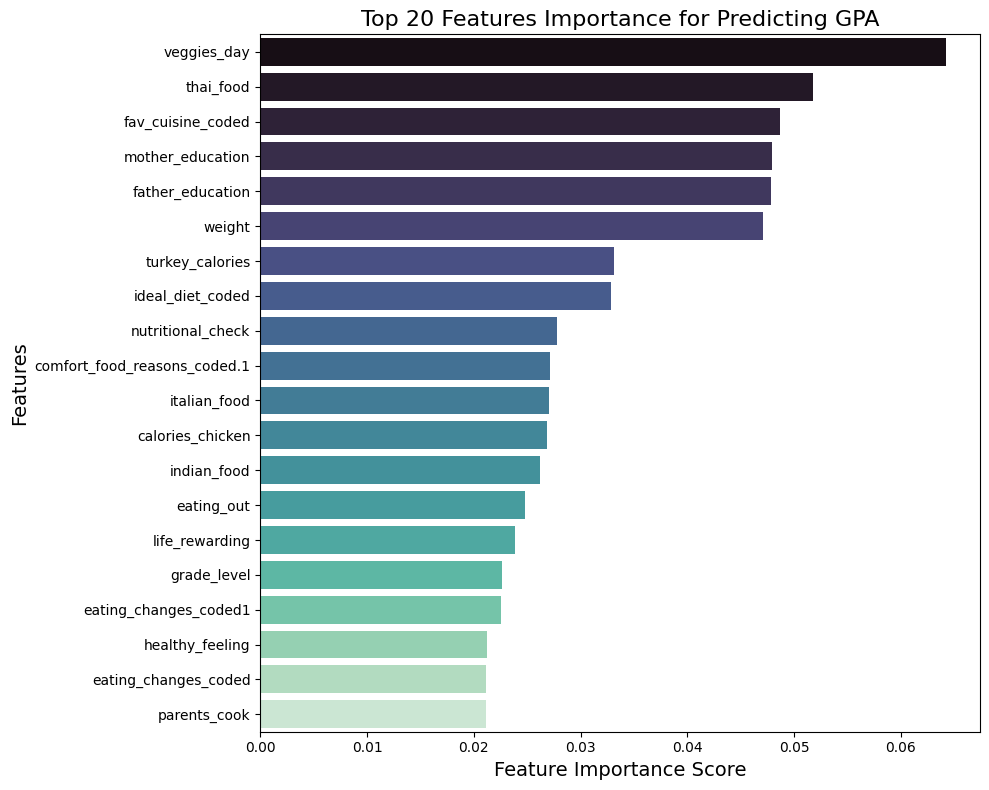

In [ ]:
# Feature selection using Random Forest
numerical_features = food_data.select_dtypes(include=['float64', 'int64']).dropna(subset=['GPA'])
X = numerical_features.drop('GPA', axis=1)
y = numerical_features['GPA']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Visualize feature importance
top_features = sorted_features[:20]
feature_names, importances = zip(*top_features)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(feature_names), x=list(importances), orient='h', palette='mako')
plt.title('Top 20 Features Importance for Predicting GPA', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
food_data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [ ]:
features = food_data.columns
features_by_dtype = {}
for f in features:
    dtype = str(food_data[f].dtype)

    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]

textual_features = features_by_dtype["object"]
numerical_features = ["weight", "GPA"]
binary_category_features = ["Gender", "vitamins", "sports"]
calories_features = [i for i in features_by_dtype["int64"] if "calories" in i]
calories_features += ["calories_scone", "tortilla_calories"]
discrete_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (food_data[i].unique().size > 2) & ("coded" not in i)]
discrete_features += ["calories_day", "cook", "exercise", "father_education", "income", "life_rewarding", "mother_education", "persian_food"]
coded_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (food_data[i].unique().size > 2) & ("coded" in i)]
coded_features += ["self_perception_weight", "comfort_food_reasons_coded", "cuisine", "employment", "fav_food", "marital_status", "on_off_campus"]
image_questions = ["drink", "soup", "coffee", "fries", "breakfast"]

# === === #

def code(value, code_dictionary):
    if value in code_dictionary.keys():
        return code_dictionary[value]
    else:
        return value

def ordinalizer(data, feature):
    output = {}
    unique = sorted(food_data[feature].unique().tolist())
    j = 1
    for i in [i for i in unique if str(i) != "nan"]:
        output[i] = j
        j += 1

    return output

def code_features_as_ordinal(data, to_be_coded):
    for feature in to_be_coded:
        cd = ordinalizer(food_data, feature)
        food_data[feature] = food_data[feature].apply(code, code_dictionary=cd)

# === === #

code_features_as_ordinal(food_data, calories_features)

from numpy import NaN

nullify = [[15, 61, 102, 104], [2, 32, 74, 61]]

for i in nullify[0]:
    food_data.at[i, "GPA"] = NaN

for i in nullify[1]:
    food_data.at[i, "weight"] = NaN

food_data.at[67, "weight"] = 144
food_data.at[3, "weight"] = 240
food_data.at[73, "GPA"] = 3.79

food_data["weight"] = food_data["weight"].apply(float)
food_data["GPA"] = food_data["GPA"].apply(float)


In [17]:
categorical_features = binary_category_features + coded_features + image_questions
for c in categorical_features:
    food_data[c] = food_data[c].apply(str)


In [18]:
from pandas import get_dummies
one_hot_encoded_data = get_dummies(food_data[categorical_features])

In [19]:
target = ["GPA", "weight"]

from pandas import concat
x1 = one_hot_encoded_data
x2 = food_data[discrete_features + calories_features + target]
X = concat([x1, x2], axis=1)


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Drop rows and columns with NaN values
    df_numeric = df_numeric.dropna(axis=0, how='any')
    df_numeric = df_numeric.dropna(axis=1, how='any')

    plt.figure(figsize=(graphWidth, graphWidth))

    # Calculate correlation matrix
    corr_matrix = df_numeric.corr()

    # Define custom color palette
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True,
                linewidths=.5, cbar_kws={"shrink": .8, "ticks": [-1, -0.5, 0, 0.5, 1], "orientation": "vertical"})

    # Customize color bar ticks and labels
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])

    plt.title('Correlation Matrix', fontsize=15)
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


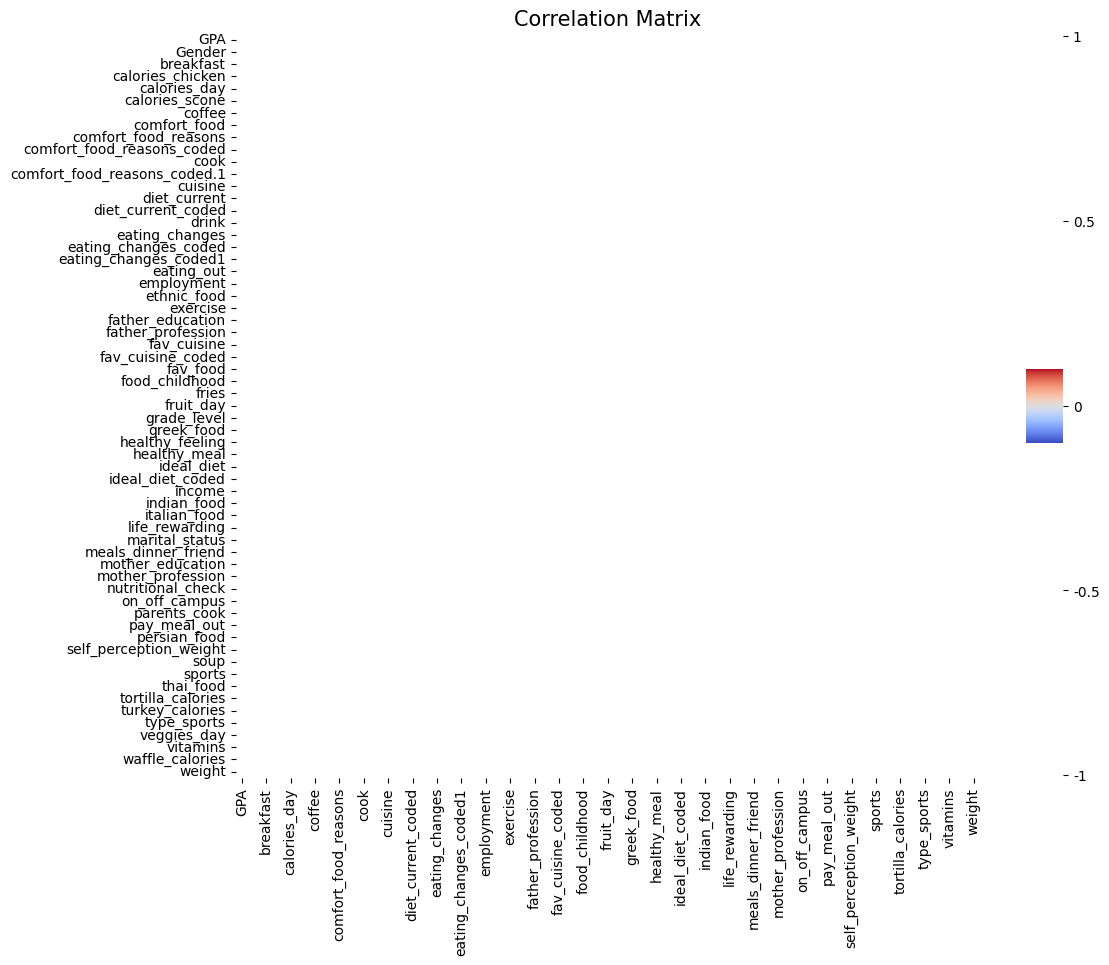

In [21]:
plotCorrelationMatrix(food_data, 12)


In [ ]:
# Scatter matrix
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    df = df.dropna(axis=1)  # drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values

    # Create scatter matrix
    plt.figure(figsize=(plotSize, plotSize))
    sns.pairplot(df, diag_kind='kde')
    plt.show()

# Example usage
plotScatterMatrix(food_data, 20, 10)


In [ ]:
plotScatterMatrix(food_data, 20, 10)


In [ ]:
#food_data.info()

In [ ]:
# Drop columns with longer text in each cell
columns_to_drop = [col for col in food_data.columns if food_data[col].apply(lambda x: isinstance(x, str) and len(x.split()) > 1).any()]

# Drop the identified columns from the dataframe
food_data = food_data.drop(columns=columns_to_drop)

In [ ]:
food_data.head()

In [ ]:
#food_data.info()

In [ ]:
# Drop rows with NaN values
food_data = food_data.dropna()


In [ ]:
food_data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,3.0,3.0,2.0,2,1.0,3.0,1,...,3.0,1.0,1.0,2.0,2.0,3.0,4.0,2,3.0,155.0
3,3.200,1,1,2.0,3.0,2.0,2,2.0,2.0,2,...,5.0,1.0,2.0,5.0,2.0,3.0,3.0,1,4.0,240.0
4,3.500,1,1,4.0,2.0,2.0,2,1.0,1.0,1,...,4.0,1.0,1.0,4.0,3.0,2.0,4.0,2,2.0,190.0
5,2.250,1,1,3.0,3.0,3.0,2,4.0,3.0,4,...,5.0,1.0,2.0,4.0,3.0,1.0,1.0,2,4.0,190.0
6,3.800,2,1,3.0,3.0,2.0,2,1.0,2.0,1,...,4.0,1.0,1.0,5.0,3.0,3.0,4.0,1,4.0,180.0


In [ ]:
# Check if all columns contain numerical values
non_numerical_columns = [col for col in food_data.columns if not food_data[col].apply(lambda x: pd.api.types.is_numeric_dtype(x)).all()]

if non_numerical_columns:
    print("Non-numerical columns:", non_numerical_columns)
else:
    print("All columns contain numerical values.")


Non-numerical columns: ['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'mother_education', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins', 'waffle_calories', 'weight']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import SimpleImputer
X = food_data.drop('GPA', axis=1)
y = round(food_data['GPA'].astype(int))

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Impute missing values as ABC cannot handle NaNs directly
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')# Handle missing values using mean imputation
X_train_scaled = imputer.fit_transform(X_train_scaled)# Impute missing values in the training data
X_test_scaled = imputer.transform(X_test_scaled)# Impute missing values in the testing data (using parameters learned from training data)

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X_train_scaled, y_train)  # Assuming y_train is your target variable

selected_features = X.columns[selector.get_support()]

In [ ]:
selected_features

Index(['calories_chicken', 'coffee', 'comfort_food_reasons_coded',
       'comfort_food_reasons_coded.1', 'eating_changes_coded', 'grade_level',
       'healthy_feeling', 'italian_food', 'veggies_day', 'vitamins'],
      dtype='object')

In [ ]:
# Fit the model
rf_model.fit(X_train_scaled[:, selector.get_support()], y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled[:, selector.get_support()])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
y_pred_labels = np.round(y_pred).astype(int)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
accuracy = accuracy_score(np.round(y_test).astype(int), y_pred_labels)
pre = precision_score(np.round(y_test).astype(int), y_pred_labels, average='weighted')
rc = recall_score(np.round(y_test).astype(int), y_pred_labels, average='weighted')
f1 = f1_score(np.round(y_test).astype(int), y_pred_labels, average='weighted')

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {pre}")
print(f"Recall: {rc}")
print(f"F1 Score: {f1}")

Accuracy: 0.8333333333333334
Precision: 0.6944444444444444
Recall: 0.8333333333333334
F1 Score: 0.7575757575757576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np


# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model
logistic_model.fit(X_train_scaled[:, selector.get_support()], y_train)


# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled[:, selector.get_support()])

# Print the predictions
print(y_pred_logistic)


[3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3]


In [ ]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, average='macro')
recall = recall_score(y_test, y_pred_logistic, average='macro')
f1 = f1_score(y_test, y_pred_logistic, average='macro')


# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7778
Precision: 0.2745
Recall: 0.3111
F1 Score: 0.2917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
